In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings("ignore")

In [77]:
mobiles = pd.read_csv("mobiles_dataset.csv")
print(mobiles.shape)
print(mobiles.dtypes)

(925, 15)
Company.Name                    object
Model.Name                      object
Mobile.Weight                   object
RAM                             object
Front.Camera                    object
Back.Camera                     object
Processor                       object
Battery.Capacity.mAh             int64
Screen.Size.inches             float64
Launched.Price.Pakistan.PKR      int64
Launched.Price.India.INR         int64
Launched.Price.China.CNY         int64
Launched.Price.USA.USD           int64
Launched.Price.Dubai.AED         int64
Launched.Year                    int64
dtype: object


In [79]:
mobiles['Pakistan_USD'] = mobiles['Launched.Price.Pakistan.PKR'] * 0.0036
mobiles['India_USD'] = mobiles['Launched.Price.India.INR'] * 0.011
mobiles['China_USD'] = mobiles['Launched.Price.China.CNY'] * 0.14
mobiles['Dubai_USD'] = mobiles['Launched.Price.Dubai.AED'] * 0.27
mobiles['USA_USD'] = mobiles['Launched.Price.USA.USD']

Correlation between battery capacity and prices:
Pakistan_USD: -0.0609
India_USD: -0.0191
China_USD: -0.0410
USA_USD: -0.0411
Dubai_USD: -0.0489


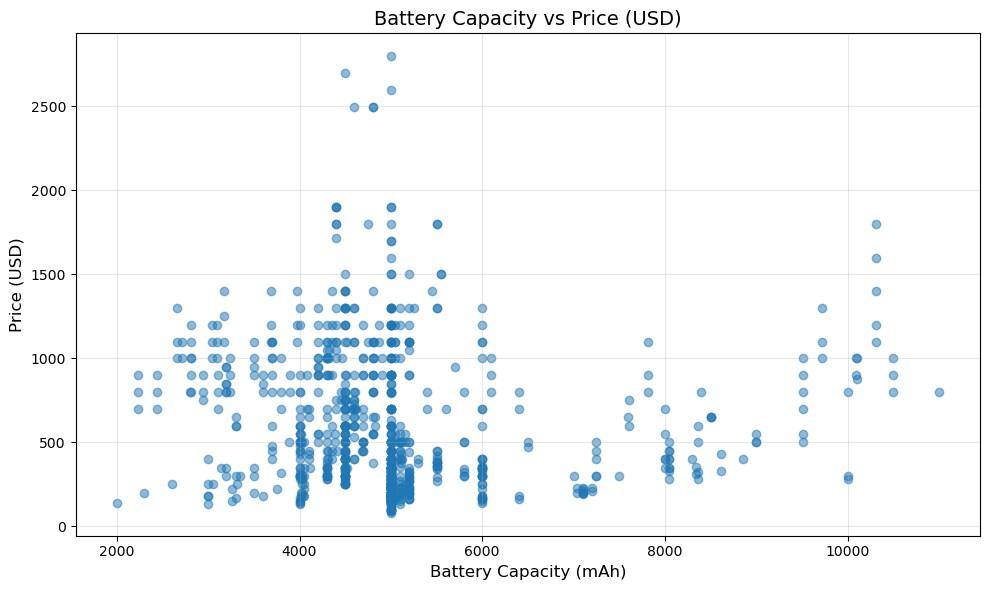

In [81]:
# Q1: Does battery capacity influence the launched price of a smartphone?
price_columns = ['Pakistan_USD', 'India_USD', 'China_USD', 'USA_USD', 'Dubai_USD']
correlation = {}

for col in price_columns:
    correlation[col] = np.corrcoef(mobiles['Battery.Capacity.mAh'], mobiles[col])[0, 1]

print("Correlation between battery capacity and prices:")
for col, corr in correlation.items():
    print(f"{col}: {corr:.4f}")

# Visualization: Battery capacity vs Price (USD)
plt.figure(figsize=(10, 6))
plt.scatter(mobiles['Battery.Capacity.mAh'], mobiles['USA_USD'], alpha=0.5)
plt.title('Battery Capacity vs Price (USD)', fontsize=14)
plt.xlabel('Battery Capacity (mAh)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

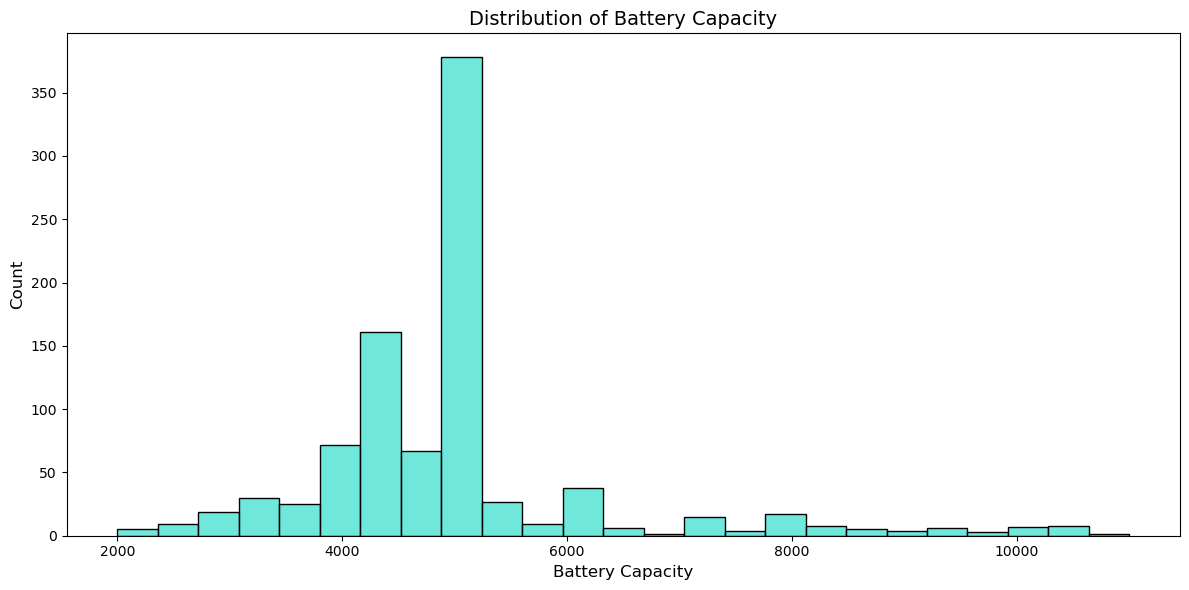

In [97]:
# Defining price categories
price_bins = [0, 250, 450, 650, 800, 1100, 1500, 2000, 3000]
price_labels = ['<$250', '$250-450', '$450-650', '$650-800', '$800-1100', '$1100-1500', '$1500-2000', '$2000+']
mobiles['Price_Category'] = pd.cut(mobiles['USA_USD'], bins=price_bins, labels=price_labels)

# Battery capacity distribution
plt.figure(figsize=(12, 6))
sns.histplot(mobiles['Battery.Capacity.mAh'], bins=25, color='turquoise', edgecolor='black')
plt.title('Distribution of Battery Capacity', fontsize=14)
plt.xlabel('Battery Capacity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

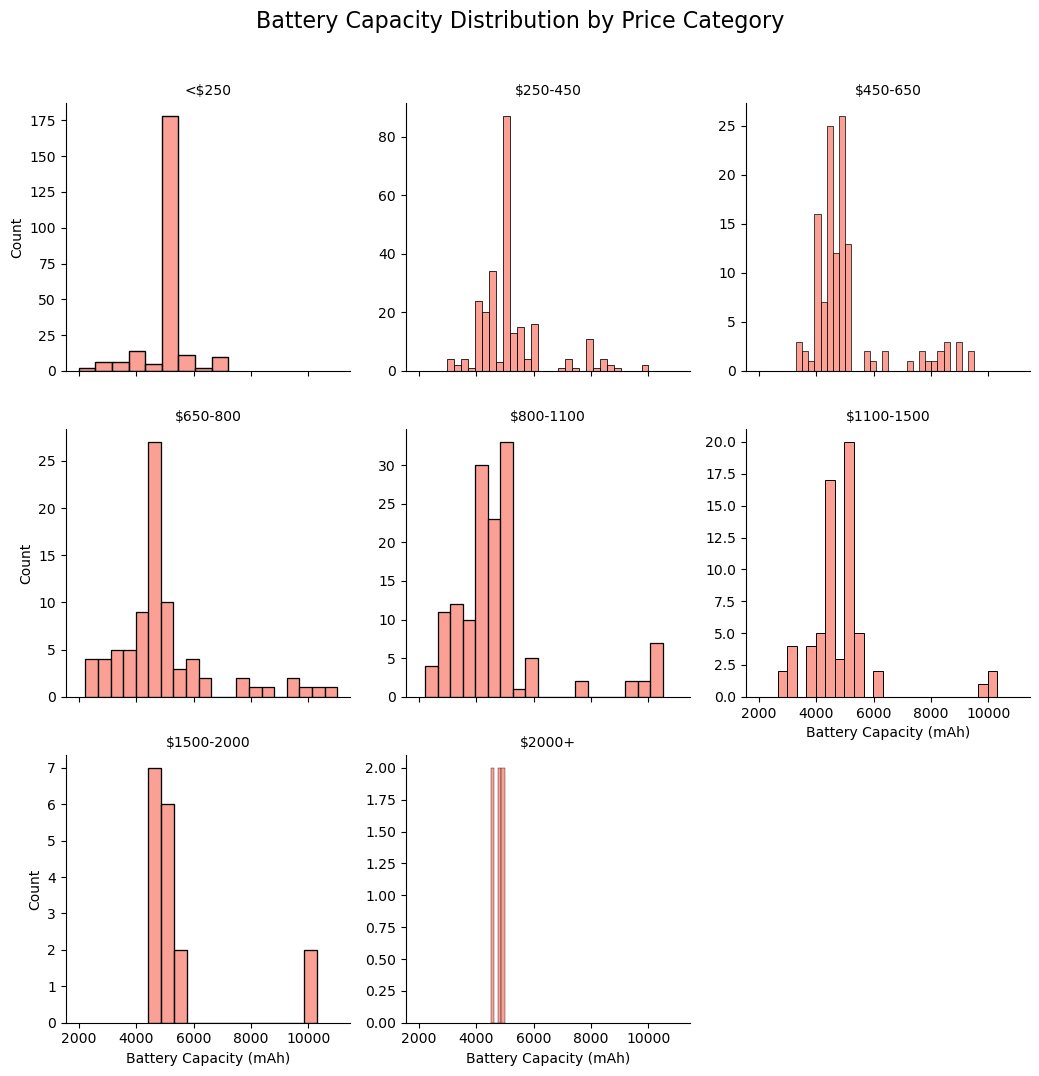


Average battery capacity by price category:
  Price_Category  Battery.Capacity.mAh
0          <$250           4977.500000
1       $250-450           5169.480315
2       $450-650           5088.536000
3       $650-800           4901.560976
4      $800-1100           4803.190141
5     $1100-1500           4854.415385
6     $1500-2000           5456.705882
7         $2000+           4783.333333
Overall average: 5004.34


In [101]:
# Faceted histograms of battery capacities (by price category)
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(mobiles, col='Price_Category', col_wrap=3, height=3.5, sharey=False)
g.map_dataframe(sns.histplot, x='Battery.Capacity.mAh', color='salmon')
g.set_axis_labels('Battery Capacity (mAh)', 'Count')
g.set_titles('{col_name}')
g.fig.suptitle('Battery Capacity Distribution by Price Category', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Summary of avg battery capacity by price categories
battery_summary = mobiles.groupby('Price_Category')['Battery.Capacity.mAh'].mean().reset_index()
print("\nAverage battery capacity by price category:")
print(battery_summary)
print(f"Overall average: {battery_summary['Battery.Capacity.mAh'].mean():.2f}")

In [103]:
# Q2: Does RAM size impact the price of smartphones?

mobiles['RAM_GB'] = mobiles['RAM'].str.extract(r'(\d+)').astype(float)

ram_correlation = {} # Correlation between RAM and prices
for col in price_columns:
    ram_correlation[col] = np.corrcoef(mobiles['RAM_GB'].dropna(), 
                                      mobiles.loc[mobiles['RAM_GB'].notna(), col])[0, 1]

print("Correlation between RAM size and prices:")
for col, corr in ram_correlation.items():
    print(f"{col}: {corr:.4f}")

Correlation between RAM size and prices:
Pakistan_USD: 0.4090
India_USD: 0.4162
China_USD: 0.4217
USA_USD: 0.4620
Dubai_USD: 0.4730


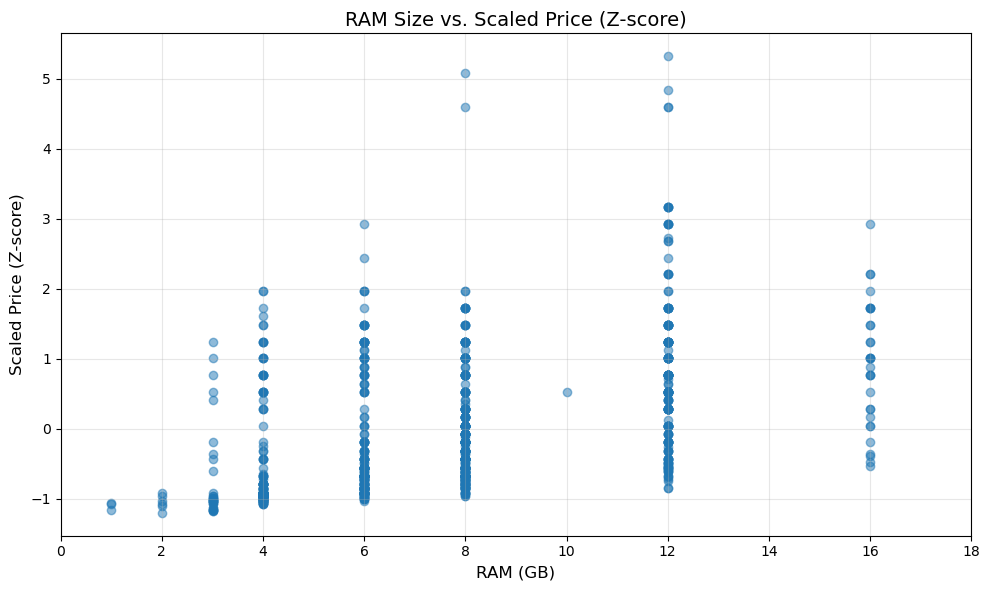

In [43]:
# Visualization: RAM Size vs Scaled Price
plt.figure(figsize=(10, 6))
z_scores = (mobiles['USA_USD'] - mobiles['USA_USD'].mean()) / mobiles['USA_USD'].std()
plt.scatter(mobiles['RAM_GB'], z_scores, alpha=0.5)
plt.title('RAM Size vs. Scaled Price (Z-score)', fontsize=14)
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Scaled Price (Z-score)', fontsize=12)
plt.xlim(0, 18)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [105]:
# Average RAM by price category
ram_by_price = mobiles.groupby('Price_Category')['RAM_GB'].mean().reset_index()
print("\nAverage RAM by price category:")
print(ram_by_price)

# AVG price by RAM
price_by_ram = mobiles.groupby('RAM_GB')[price_columns].mean().reset_index()
price_by_ram = price_by_ram[price_by_ram['RAM_GB'] <= 16]

# Melting the dataframe (for plotting)
melted_price_by_ram = pd.melt(price_by_ram, id_vars=['RAM_GB'], value_vars=price_columns, var_name='Region', value_name='Price')
melted_price_by_ram['Region'] = melted_price_by_ram['Region'].str.replace('_USD', '')


Average RAM by price category:
  Price_Category     RAM_GB
0          <$250   5.025641
1       $250-450   7.799213
2       $450-650   8.744000
3       $650-800   9.292683
4      $800-1100   8.936620
5     $1100-1500   9.938462
6     $1500-2000  11.529412
7         $2000+  10.666667


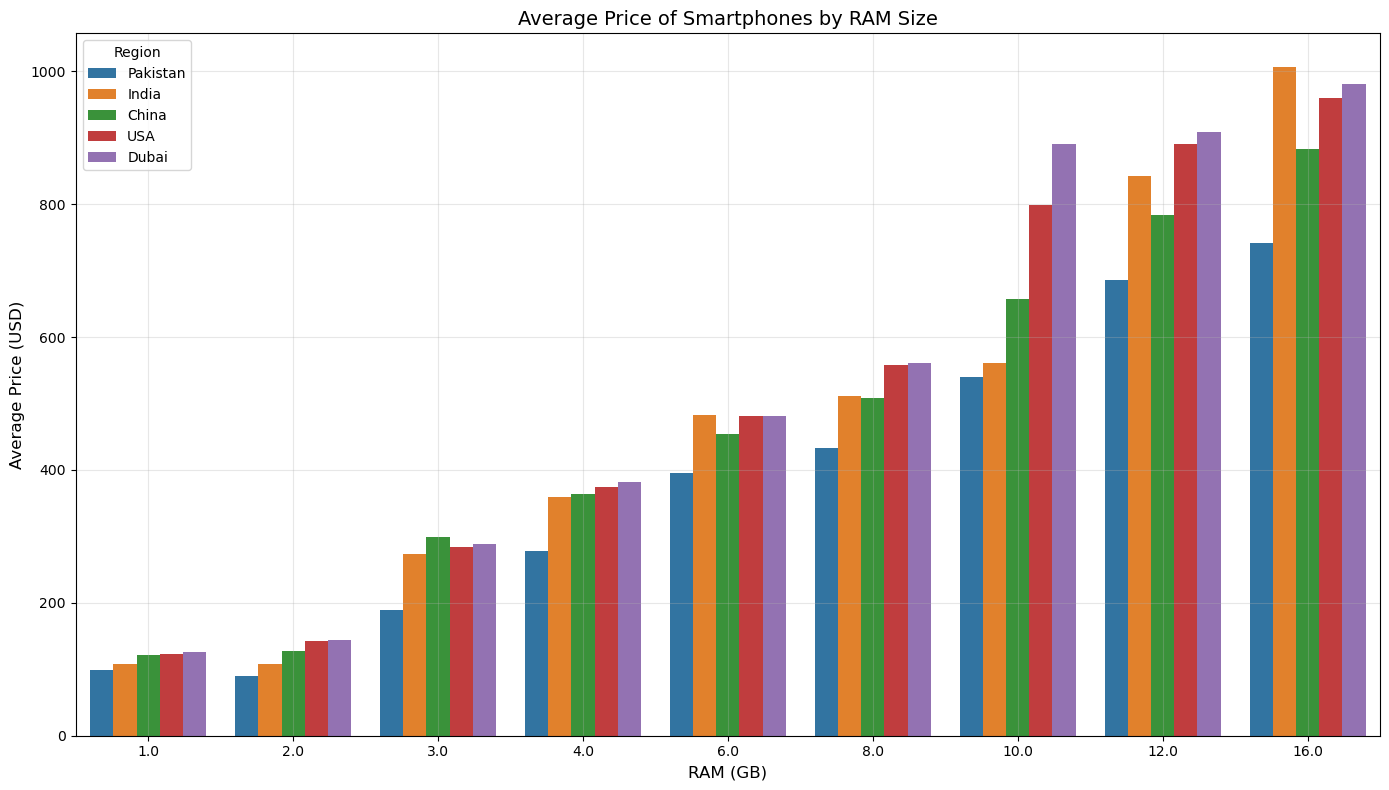

In [45]:
# Visualization: Average Price by RAM Size
plt.figure(figsize=(14, 8))
sns.barplot(x='RAM_GB', y='Price', hue='Region', data=melted_price_by_ram)
plt.title('Average Price of Smartphones by RAM Size', fontsize=14)
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.legend(title='Region')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

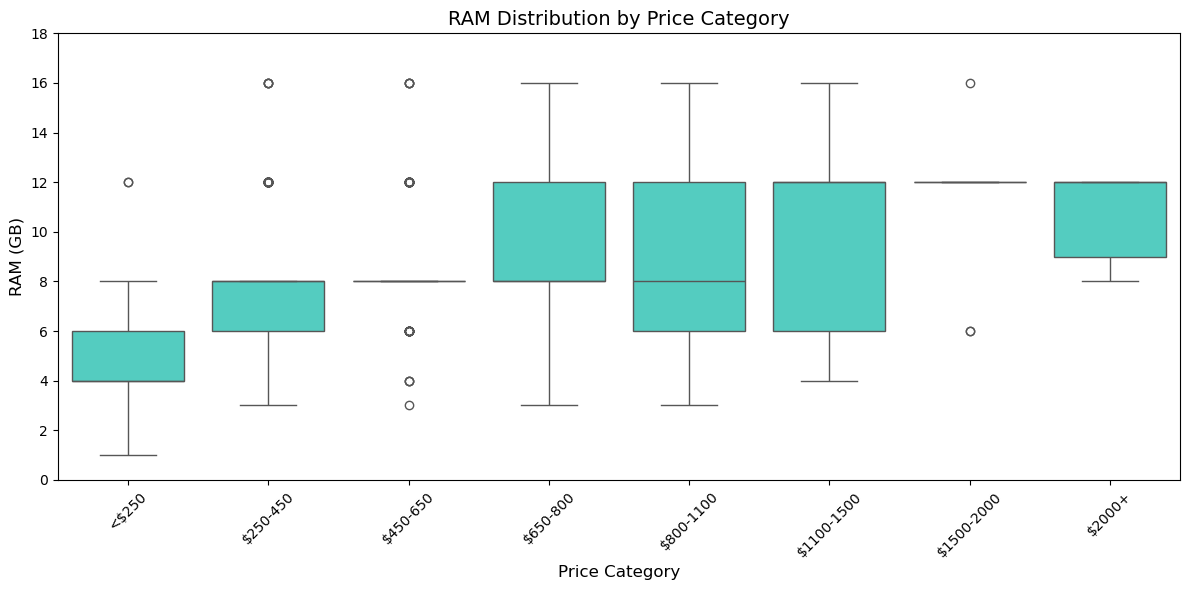

In [112]:
# RAM Distribution by Price Category (Box Plot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price_Category', y='RAM_GB', color = "turquoise", data=mobiles)
plt.title('RAM Distribution by Price Category', fontsize=14)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('RAM (GB)', fontsize=12)
plt.ylim(0, 18)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [114]:
# Q3: Do Apple devices have a higher price variation across regions?

# Price variation coefficient (VC) for each device
mobiles['Price_CV'] = mobiles[price_columns].apply(lambda x: np.std(x) / np.mean(x) * 100, axis=1)
mobiles['Price_Range_Pct'] = mobiles[price_columns].apply(
    lambda x: (x.max() - x.min()) / x['USA_USD'] * 100 if x['USA_USD'] > 0 else np.nan, axis=1)

top_brands = mobiles['Company.Name'].value_counts().nlargest(10).index.tolist()

# Brand statistics regarding the price variation
brand_stats = mobiles[mobiles['Company.Name'].isin(top_brands)].groupby('Company.Name').agg(
                                                                                            Mean_CV=('Price_CV', 'mean'),
                                                                                            SD_CV=('Price_CV', 'std'),
                                                                                            Count=('Price_CV', 'count')).reset_index()

brand_stats = brand_stats.sort_values(by='Mean_CV', ascending=False)

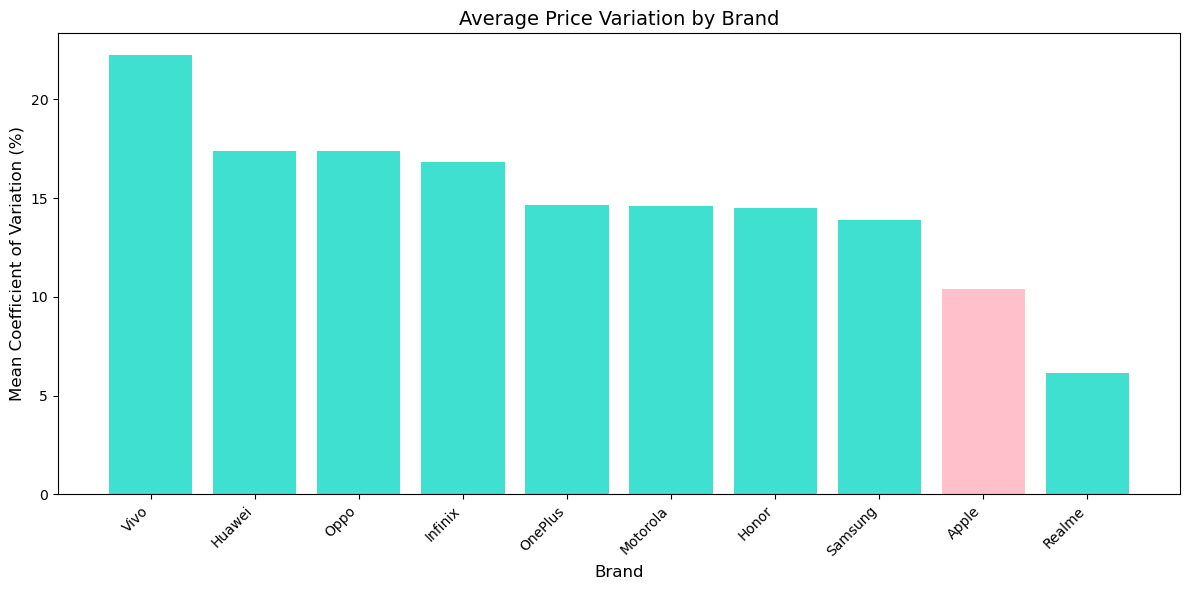

In [116]:
# Visualization: AVG Price Variation by Brand
plt.figure(figsize=(12, 6))
colors = ['pink' if brand == 'Apple' else 'turquoise' for brand in brand_stats['Company.Name']]
bars = plt.bar(brand_stats['Company.Name'], brand_stats['Mean_CV'], color=colors)
plt.title('Average Price Variation by Brand', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Mean Coefficient of Variation (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [246]:
# Regional price differences compared to US
# AVG ratios by brand
price_ratios = {}

for brand in top_brands:
    brand_data = mobiles[mobiles['Company.Name'] == brand]
    price_ratios[brand] = {
        'Pak_vs_US': (brand_data['Pakistan_USD'] / brand_data['USA_USD'] * 100).mean(),
        'India_vs_US': (brand_data['India_USD'] / brand_data['USA_USD'] * 100).mean(),
        'China_vs_US': (brand_data['China_USD'] / brand_data['USA_USD'] * 100).mean(),
        'Dubai_vs_US': (brand_data['Dubai_USD'] / brand_data['USA_USD'] * 100).mean(),
        'Model_Count': len(brand_data)}

price_ratios_df = pd.DataFrame.from_dict(price_ratios, orient='index').reset_index()
price_ratios_df.rename(columns={'index': 'Brand'}, inplace=True)

# Melting for visualization
price_ratios_long = pd.melt(price_ratios_df, 
                           id_vars=['Brand', 'Model_Count'],
                           value_vars=['Pak_vs_US', 'India_vs_US', 'China_vs_US', 'Dubai_vs_US'],
                           var_name='Region', 
                           value_name='Ratio')
# Mapping region names
region_map = {
    'Pak_vs_US': 'Pakistan',
    'India_vs_US': 'India',
    'China_vs_US': 'China',
    'Dubai_vs_US': 'Dubai'}
price_ratios_long['Region'] = price_ratios_long['Region'].map(region_map)
price_ratios_long['Difference'] = price_ratios_long['Ratio'] - 100

<Figure size 1500x1200 with 0 Axes>

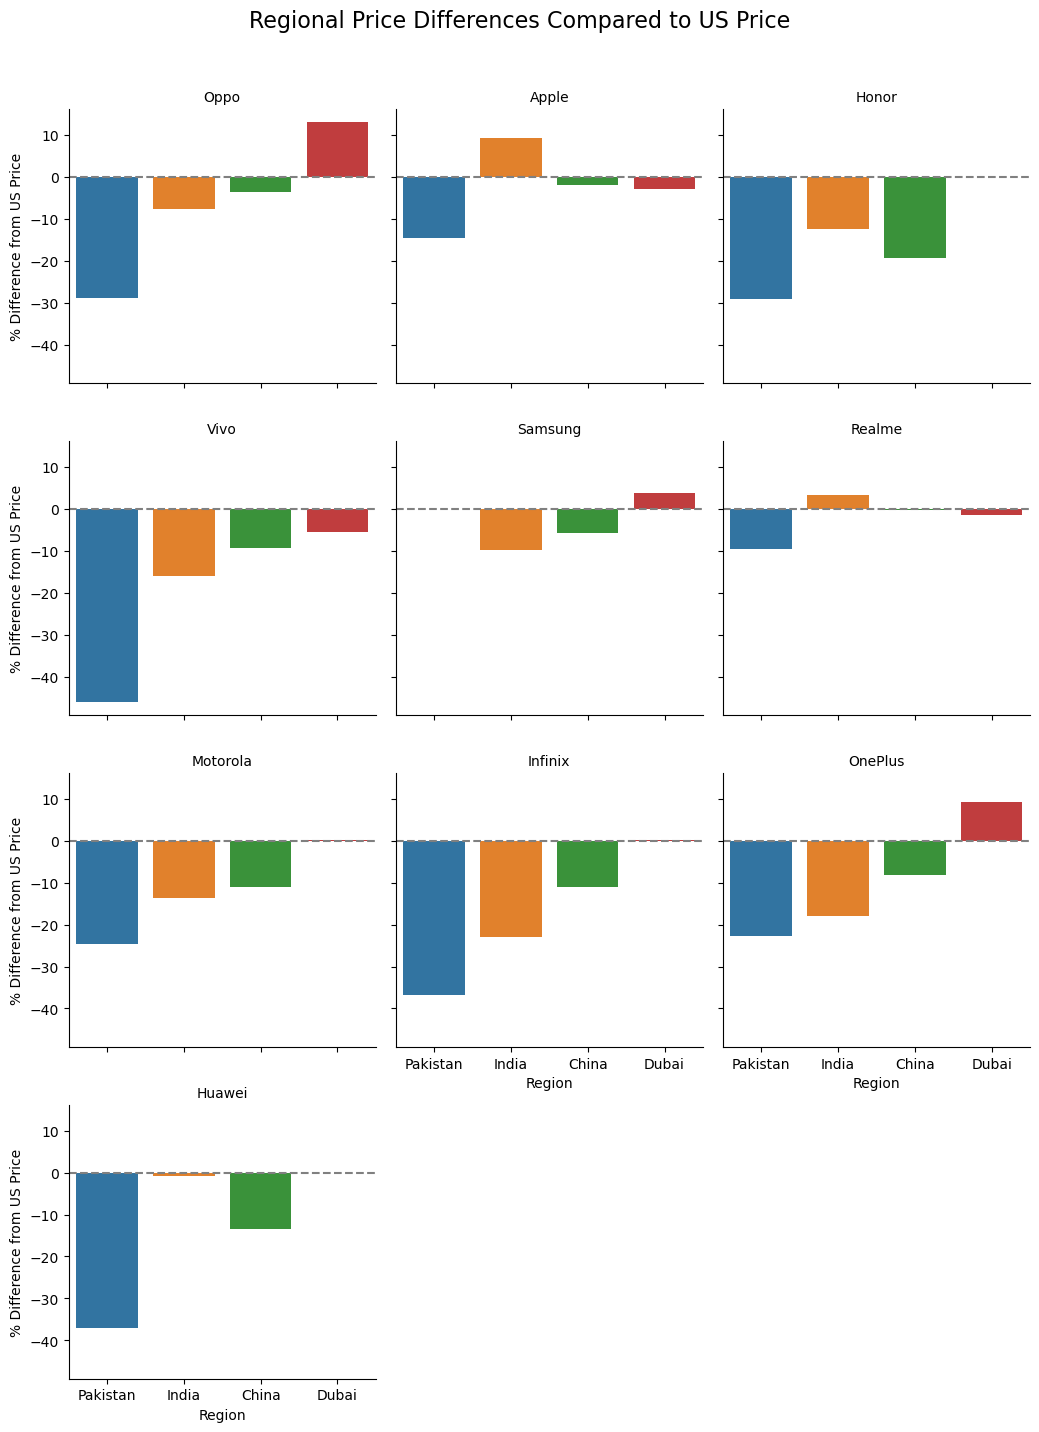

In [248]:
# Visualization: Regional price differences by brand
plt.figure(figsize=(15, 12))
g = sns.FacetGrid(price_ratios_long, col='Brand', col_wrap=3, height=3.5)
g.map_dataframe(sns.barplot, x='Region', y='Difference', hue='Region', palette='tab10')
g.set_axis_labels('Region', '% Difference from US Price')
g.set_titles('{col_name}')
g.fig.suptitle('Regional Price Differences Compared to US Price', fontsize=16, y=1.02)
for ax in g.axes.flat: # Adding a horizontal line at y = 0
    ax.axhline(y=0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

In [250]:
# Price distribution by region (comparing Apple vs other brands)
mobiles['Apple'] = np.where(mobiles['Company.Name'] == 'Apple', 'Apple', 'Other Brands')

# Long format for histograms
price_data_long = pd.melt(mobiles[['Company.Name', 'Apple'] + price_columns],
                         id_vars=['Company.Name', 'Apple'],
                         value_vars=price_columns,
                         var_name='Region',
                         value_name='Price')
price_data_long['Region'] = price_data_long['Region'].str.replace('_USD', '')

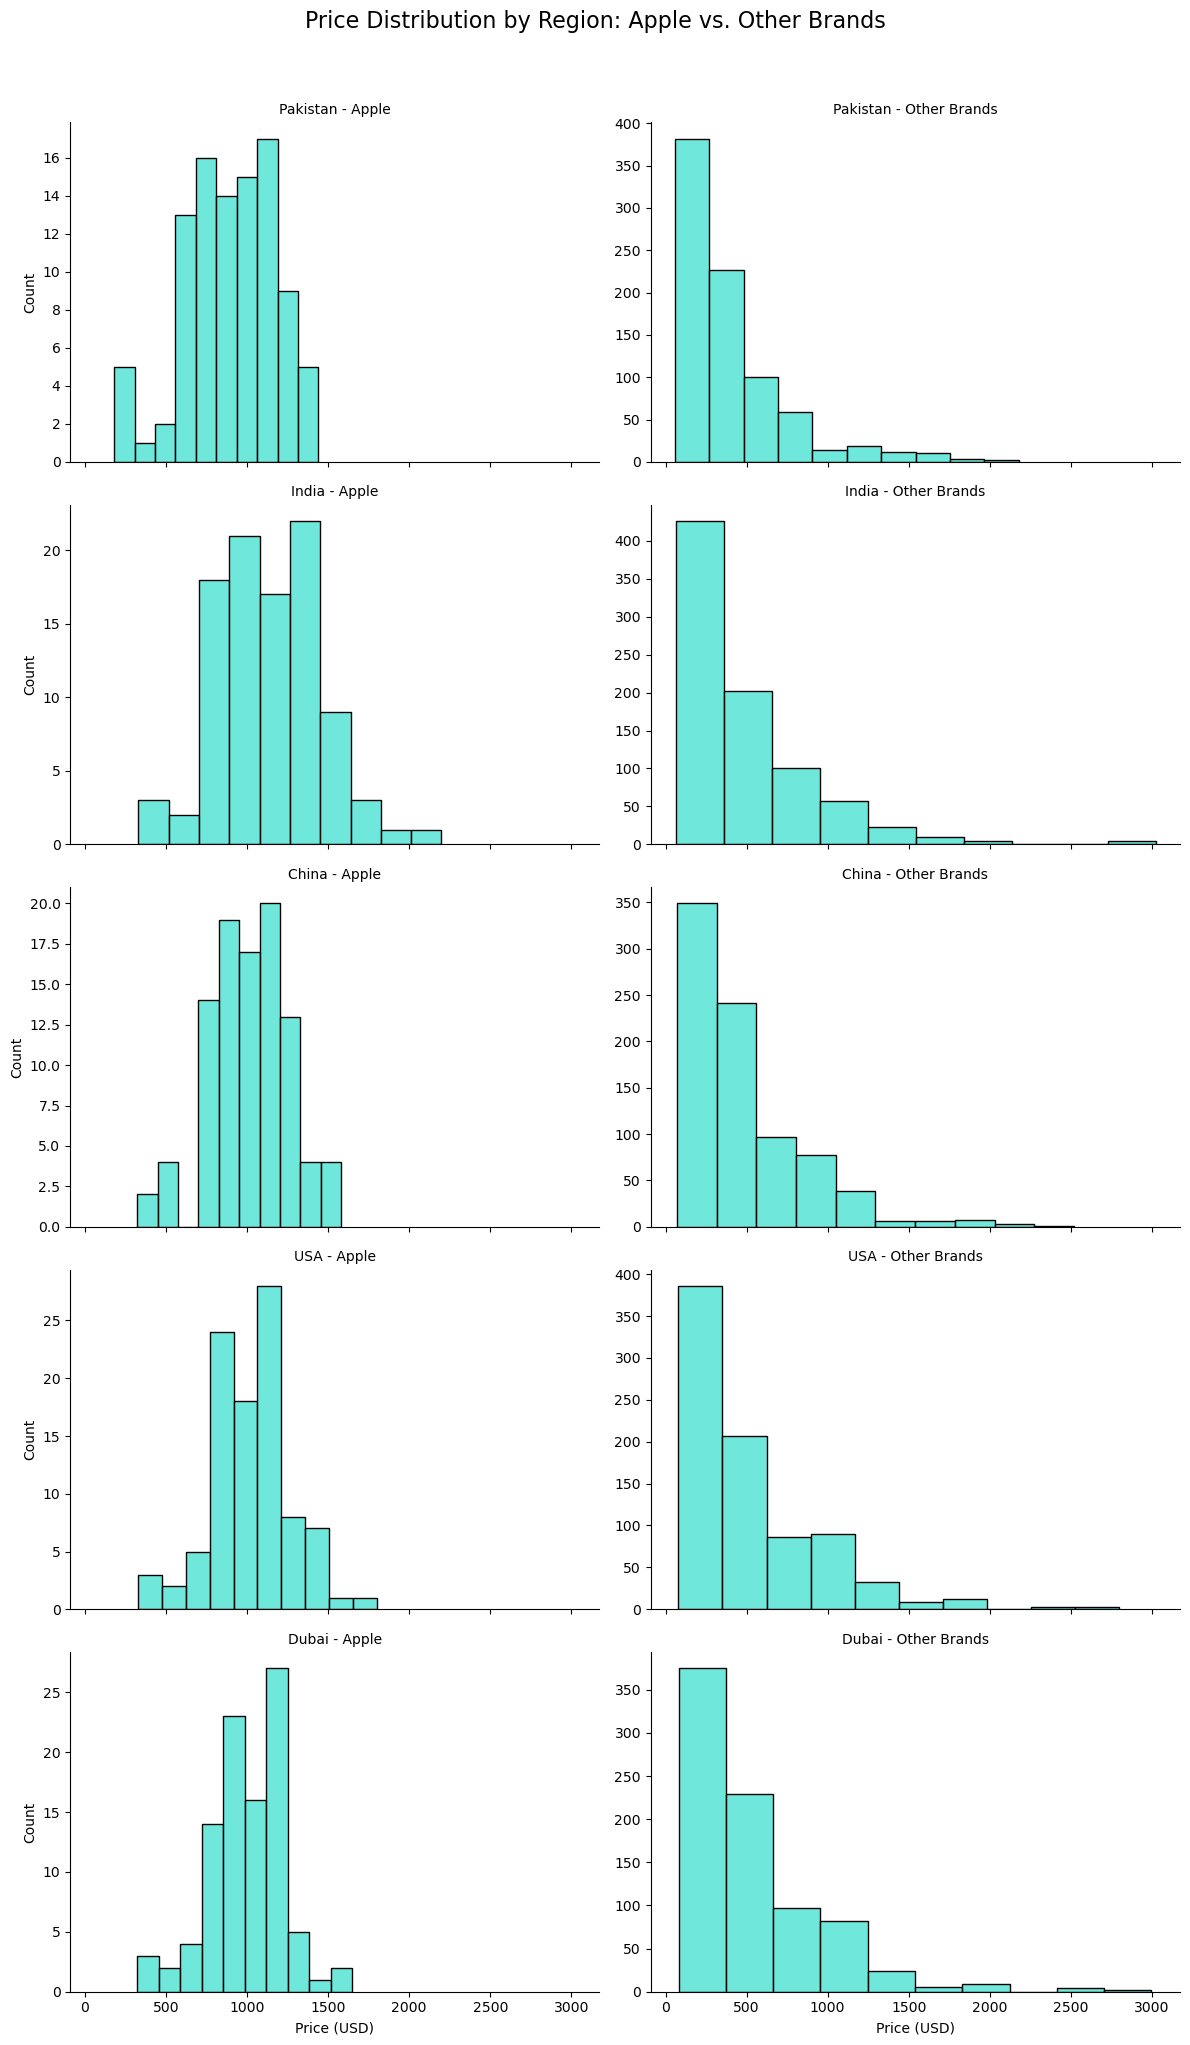

In [142]:
# Visualization: Price distribution by region (Apple vs Other)
g = sns.FacetGrid(price_data_long, row='Region', col='Apple', height=4, aspect=1.5, sharey=False)
g.map_dataframe(sns.histplot, x='Price', bins=10, color = "turquoise")
g.set_axis_labels('Price (USD)', 'Count')
g.set_titles('{row_name} - {col_name}')
g.fig.suptitle('Price Distribution by Region: Apple vs. Other Brands', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [252]:
# Price difference distribution (Apple vs Others)
for brand_type in ['Apple', 'Other Brands']:
    subset = mobiles[mobiles['Apple'] == brand_type]
    for region in ['Pakistan', 'India', 'China', 'Dubai']:
        col_name = f"{region}_Diff"
        mobiles.loc[mobiles['Apple'] == brand_type, col_name] =  ((subset[f"{region}_USD"] - subset['USA_USD']) /
                                                                   subset['USA_USD'] * 100).values # Differences 
                                                                                                    # from US price

diff_cols = ['Pakistan_Diff', 'India_Diff', 'China_Diff', 'Dubai_Diff']
diff_data = pd.melt(mobiles[['Apple'] + diff_cols], # Melting for visualization
                   id_vars=['Apple'],
                   value_vars=diff_cols,
                   var_name='Region',
                   value_name='Percent_Diff')
diff_data['Region'] = diff_data['Region'].str.replace('_Diff', '')

<Figure size 1000x600 with 0 Axes>

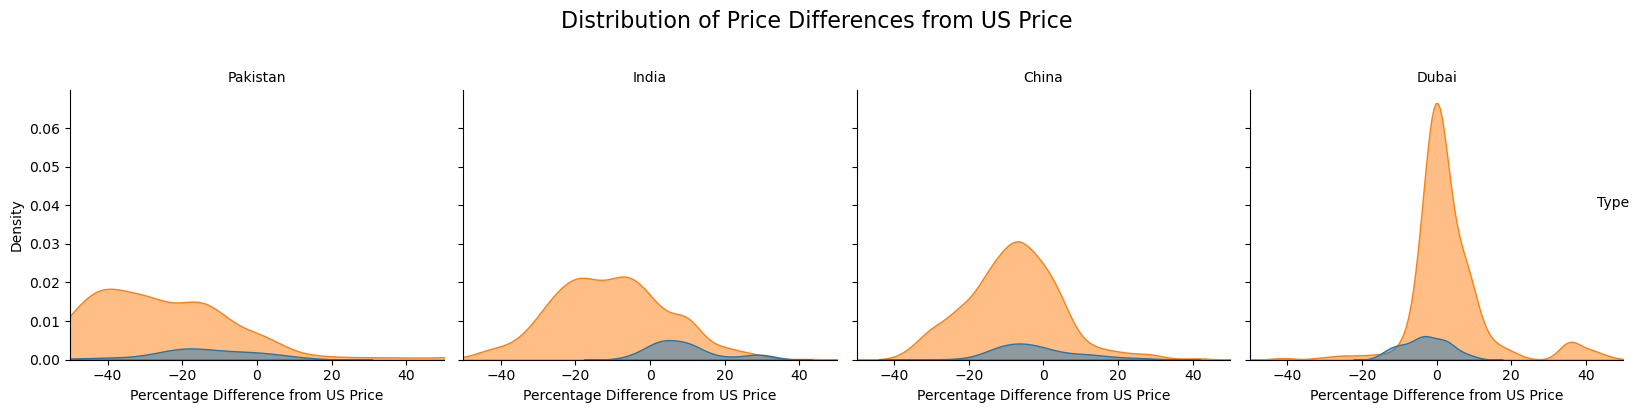

In [154]:
# Visualization: Distribution of price differences
plt.figure(figsize=(10, 6))
g = sns.FacetGrid(diff_data, col='Region', height=4, aspect=1)
g.map_dataframe(sns.kdeplot, x='Percent_Diff', hue='Apple', fill=True, alpha=0.5)
g.set_axis_labels('Percentage Difference from US Price', 'Density')
g.add_legend(title='Type')
g.set_titles('{col_name}')
g.fig.suptitle('Distribution of Price Differences from US Price', fontsize=16, y=1.02)
for ax in g.axes.flat:
    ax.set_xlim(-50, 50)
plt.tight_layout()
plt.show()

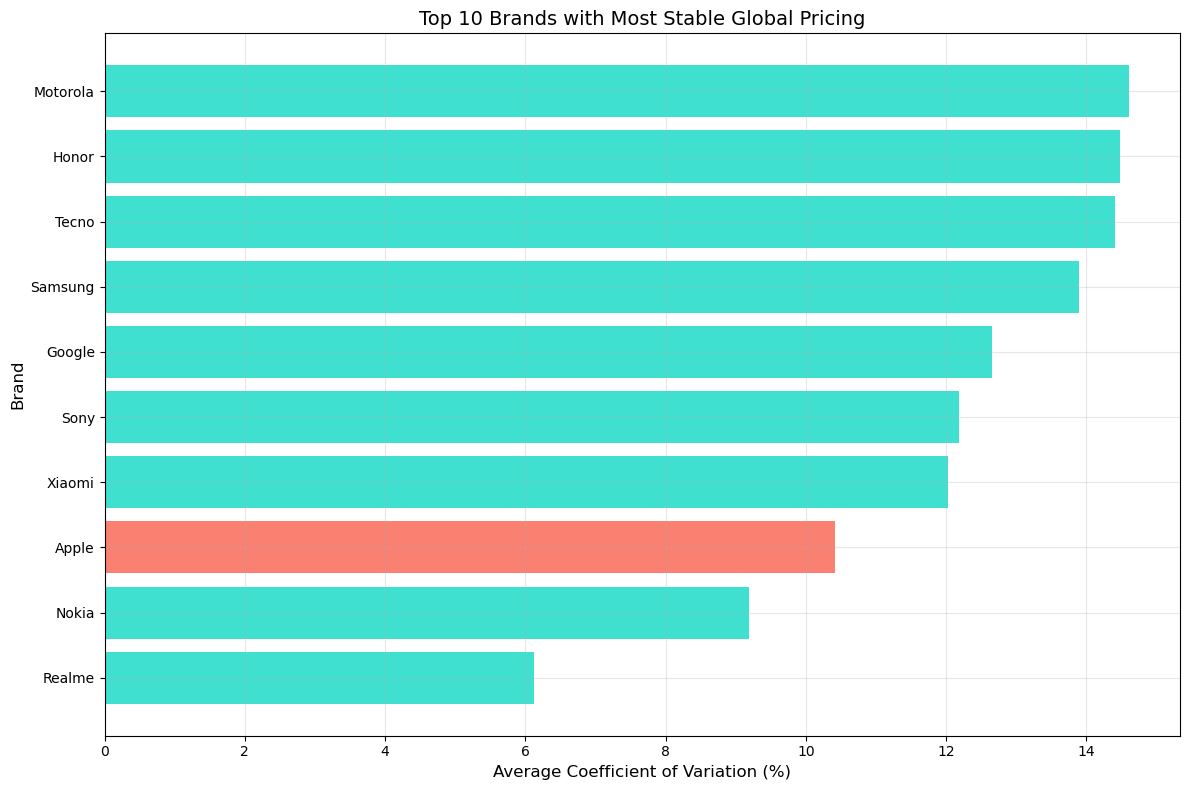

In [156]:
# Top 10 brands by price stability (To find the lowest CV)
stable_brands = mobiles.groupby('Company.Name').agg(Avg_CV=('Price_CV', 'mean'), Model_Count=('Price_CV', 'count')).reset_index()
stable_brands = stable_brands[stable_brands['Model_Count'] >= 5].sort_values('Avg_CV').head(10)

# Visualization: Most stable global pricing
plt.figure(figsize=(12, 8))
colors = ['salmon' if brand == 'Apple' else 'turquoise' for brand in stable_brands['Company.Name']]
plt.barh(stable_brands['Company.Name'], stable_brands['Avg_CV'], color=colors)
plt.title('Top 10 Brands with Most Stable Global Pricing', fontsize=14)
plt.xlabel('Average Coefficient of Variation (%)', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [158]:
# Q4: Do all smartphone brands have flagship and budget-friendly models?

budget_threshold = 300
midrange_threshold = 700

market_position = []
for brand, group in mobiles.groupby('Company.Name'):
    total_models = len(group)
    budget_models = sum(group['USA_USD'] < budget_threshold)
    midrange_models = sum((group['USA_USD'] >= budget_threshold) & (group['USA_USD'] <= midrange_threshold))
    premium_models = sum(group['USA_USD'] > midrange_threshold)

    # Market position stats for each brand
    market_position.append({
        'Company.Name': brand,
        'total_models': total_models,
        'budget_models': budget_models,
        'midrange_models': midrange_models,
        'premium_models': premium_models,
        'budget_percentage': budget_models / total_models * 100,
        'midrange_percentage': midrange_models / total_models * 100,
        'premium_percentage': premium_models / total_models * 100,
        'has_budget': budget_models > 0,
        'has_midrange': midrange_models > 0,
        'has_premium': premium_models > 0})

market_position_df = pd.DataFrame(market_position)

# Filtering brands with at least 10 models to avoid errors
market_position_df = market_position_df[market_position_df['total_models'] >= 10].copy()

# Determining segment coverage
def segment_coverage(row):
    if row['has_budget'] and row['has_midrange'] and row['has_premium']:
        return 'Full range'
    elif not row['has_budget'] and row['has_midrange'] and row['has_premium']:
        return 'Mid-range & Premium only'
    elif row['has_budget'] and row['has_midrange'] and not row['has_premium']:
        return 'Budget & Mid-range only'
    elif row['has_budget'] and not row['has_midrange'] and row['has_premium']:
        return 'Budget & Premium only'
    elif not row['has_budget'] and not row['has_midrange'] and row['has_premium']:
        return 'Premium only'
    elif not row['has_budget'] and row['has_midrange'] and not row['has_premium']:
        return 'Mid-range only'
    elif row['has_budget'] and not row['has_midrange'] and not row['has_premium']:
        return 'Budget only'
    else:
        return '?'

market_position_df['segment_coverage'] = market_position_df.apply(segment_coverage, axis=1)
market_position_df = market_position_df.sort_values('premium_percentage', ascending=False)

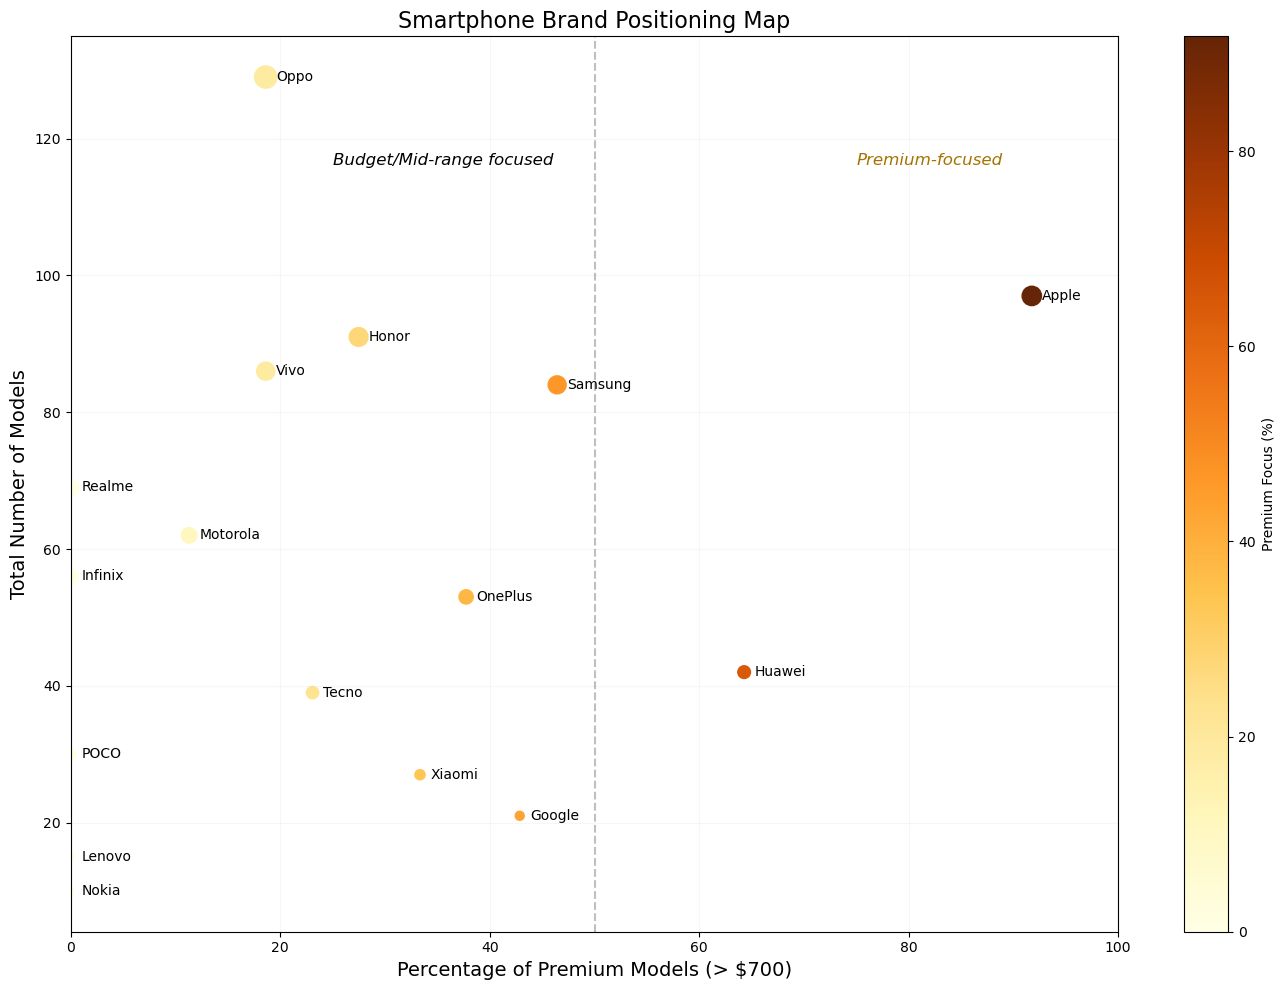

In [178]:
# Smartphone brand positioning map
plt.figure(figsize=(14, 10))
plt.scatter(market_position_df['premium_percentage'], 
           market_position_df['total_models'], 
           s=market_position_df['total_models'] * 2, 
           c=market_position_df['premium_percentage'], cmap='YlOrBr')

for i, row in market_position_df.iterrows():
    plt.text(row['premium_percentage'] + 1, row['total_models'], 
             row['Company.Name'], fontsize=10, verticalalignment='center')

plt.axvline(x=50, linestyle='--', color='gray', alpha=0.5)
plt.text(25, max(market_position_df['total_models']) * 0.9, 
         "Budget/Mid-range focused", color='black', fontsize=12, fontstyle='italic')
plt.text(75, max(market_position_df['total_models']) * 0.9, "Premium-focused", color='#A57200', fontsize=12, fontstyle='italic', alpha=1)

plt.title('Smartphone Brand Positioning Map', fontsize=16)
plt.xlabel('Percentage of Premium Models (> $700)', fontsize=14)
plt.ylabel('Total Number of Models', fontsize=14)
plt.colorbar(label='Premium Focus (%)')
plt.xlim(0, 100)
plt.grid(True, alpha=0.1)
plt.tight_layout()
plt.show()

<Figure size 1500x1200 with 0 Axes>

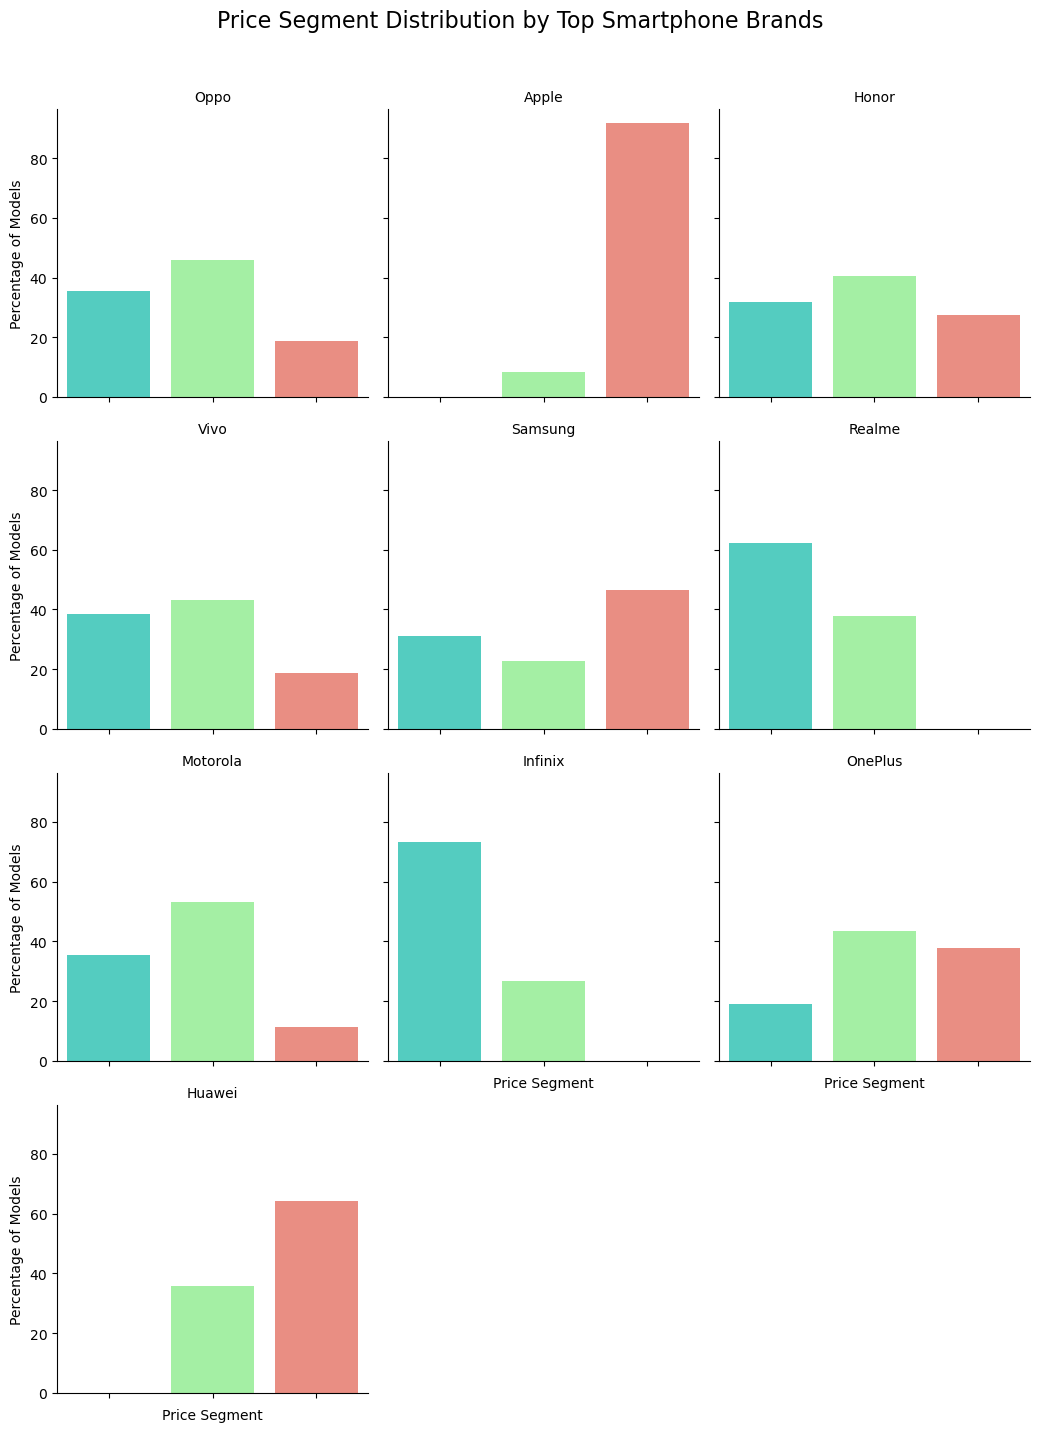

In [254]:
# Segment distribution data for visualization
segment_dist = []
for brand in top_brands:
    brand_data = mobiles[mobiles['Company.Name'] == brand]
    total = len(brand_data)
    
    for segment, threshold in [
        ('Budget (< $300)', budget_threshold),
        ('Mid-range ($300-$700)', midrange_threshold)
    ]:
        if segment == 'Budget (< $300)':
            count = sum(brand_data['USA_USD'] < threshold)
        else:  # Mid-range
            count = sum((brand_data['USA_USD'] >= budget_threshold) & 
                        (brand_data['USA_USD'] <= midrange_threshold))
        
        segment_dist.append({
            'Company.Name': brand,
            'price_segment': segment,
            'count': count,
            'percentage': count / total * 100
        })
    
    # Premium segment
    count = sum(brand_data['USA_USD'] > midrange_threshold)
    segment_dist.append({
        'Company.Name': brand,
        'price_segment': 'Premium (> $700)',
        'count': count,
        'percentage': count / total * 100})

segment_dist_df = pd.DataFrame(segment_dist)

# Correct ordering of price segments
segment_order = ['Budget (< $300)', 'Mid-range ($300-$700)', 'Premium (> $700)']
segment_dist_df['price_segment'] = pd.Categorical(
    segment_dist_df['price_segment'], 
    categories=segment_order, 
    ordered=True
)

# Faceted bar chart for price segment distribution
plt.figure(figsize=(15, 12))
g = sns.FacetGrid(segment_dist_df, col='Company.Name', col_wrap=3, height=3.5)
g.map_dataframe(sns.barplot, x='price_segment', y='percentage', palette=['turquoise', 'palegreen', 'salmon'])
g.set_xticklabels(rotation=45, ha='right')
g.set_axis_labels('Price Segment', 'Percentage of Models')
g.set_titles('{col_name}')
g.fig.suptitle('Price Segment Distribution by Top Smartphone Brands', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

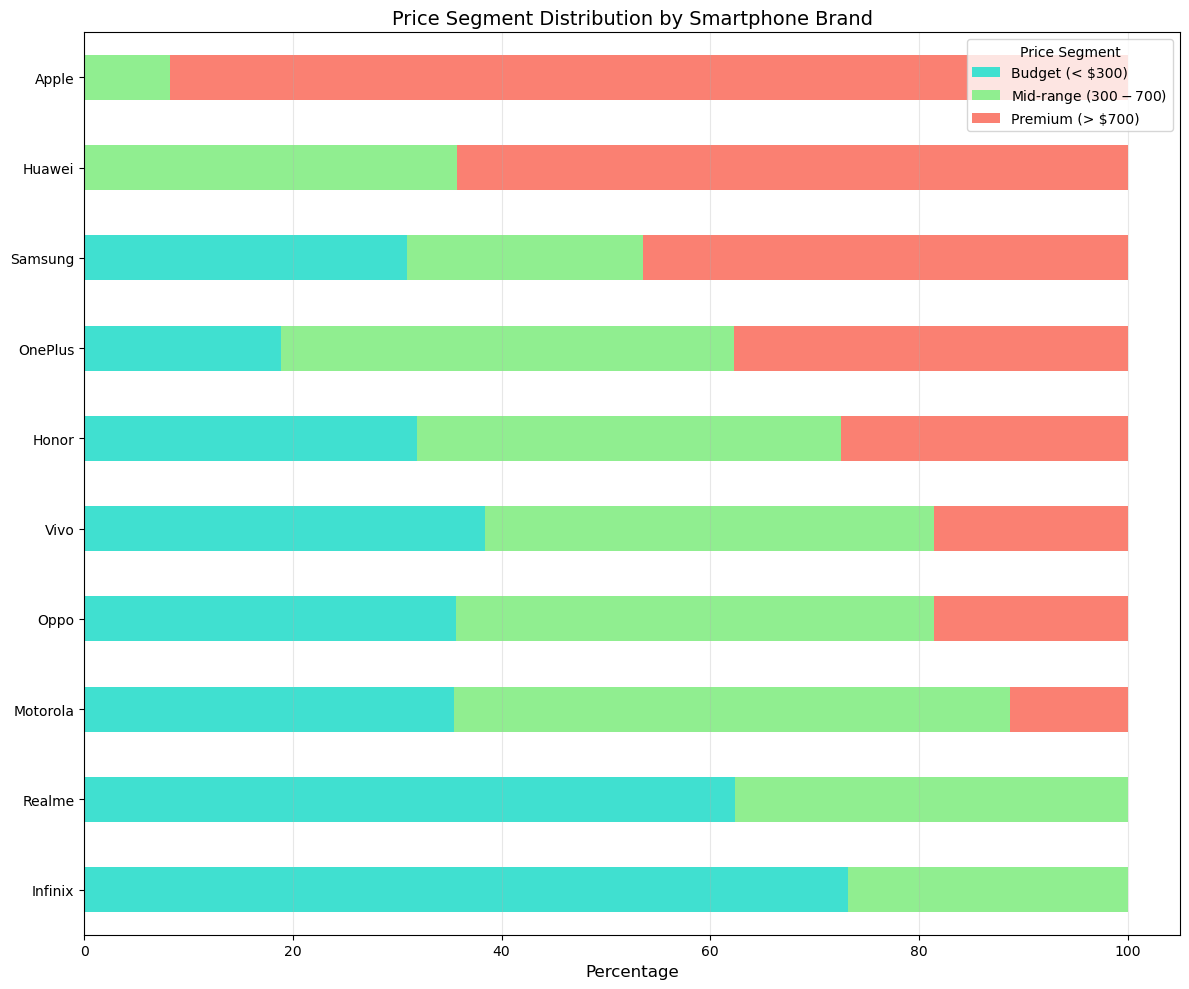

In [190]:
# Stacked bar chart for price segment distribution
plt.figure(figsize=(12, 10))
segment_pivot = segment_dist_df.pivot_table(index='Company.Name', 
                                            columns='price_segment', 
                                            values='percentage',
                                            aggfunc='first').reset_index()

segment_pivot = segment_pivot.sort_values('Premium (> $700)', ascending=True)

ax = segment_pivot.plot(x='Company.Name',
                        y=['Budget (< $300)', 'Mid-range ($300-$700)', 'Premium (> $700)'],
                        kind='barh',
                        stacked=True,
                        figsize=(12, 10),
                        color=['turquoise', 'lightgreen', 'salmon'])

plt.title('Price Segment Distribution by Smartphone Brand', fontsize=14)
plt.xlabel('Percentage', fontsize=12)
plt.ylabel('', fontsize=12)
plt.legend(title='Price Segment')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [256]:
# Q5: Which region offers the most affordable smartphone prices on average?

# Calculatinh avg prices by region
region_prices = pd.DataFrame({
    'Region': ['Pakistan', 'India', 'China', 'USA', 'Dubai'],
    'Price_USD': [round(mobiles['Pakistan_USD'].mean()),
                  round(mobiles['India_USD'].mean()),
                  round(mobiles['China_USD'].mean()),
                  round(mobiles['USA_USD'].mean()),
                  round(mobiles['Dubai_USD'].mean())]})
region_prices = region_prices.sort_values('Price_USD', ascending=False)

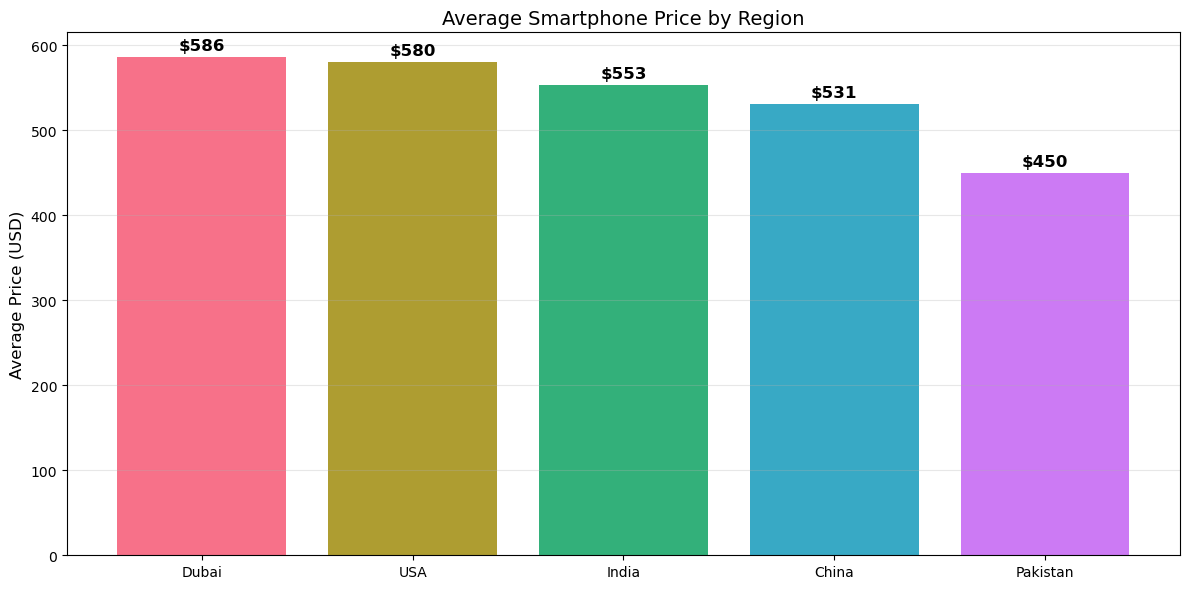

In [194]:
# Visualization: Average smartphone price by region
plt.figure(figsize=(12, 6))
bars = plt.bar(region_prices['Region'], region_prices['Price_USD'], width=0.8, color=sns.color_palette('husl', 5))
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + 5,
            f'${int(height)}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Average Smartphone Price by Region', fontsize=14)
plt.xlabel('', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [258]:
# Finding brands with biggest price differences
brand_price_range = []
for brand in mobiles['Company.Name'].unique():
    if sum(mobiles['Company.Name'] == brand) < 5:
        continue
        
    brand_data = mobiles[mobiles['Company.Name'] == brand]
    
    # Abverage prices by region
    avg_prices = {'Pakistan': brand_data['Pakistan_USD'].mean(),
                    'India': brand_data['India_USD'].mean(),
                    'China': brand_data['China_USD'].mean(),
                    'USA': brand_data['USA_USD'].mean(),
                    'Dubai': brand_data['Dubai_USD'].mean()}
    
    min_region = min(avg_prices, key=avg_prices.get)
    max_region = max(avg_prices, key=avg_prices.get)
    min_price = avg_prices[min_region]
    max_price = avg_prices[max_region]
    
    if min_price > 0:
        price_range_pct = (max_price - min_price) / min_price * 100
    else:
        price_range_pct = 0
        
    brand_price_range.append({'Company.Name': brand,
                              'Min_Region': min_region,
                              'Min_Price': min_price,
                              'Max_Region': max_region,
                              'Max_Price': max_price,
                              'Price_Range_Pct': price_range_pct})

brand_price_range_df = pd.DataFrame(brand_price_range)
brand_price_range_df = brand_price_range_df.sort_values('Price_Range_Pct', ascending=False)

# Top 10 brands with biggest price differences
top_10_price_diff = brand_price_range_df.head(10)

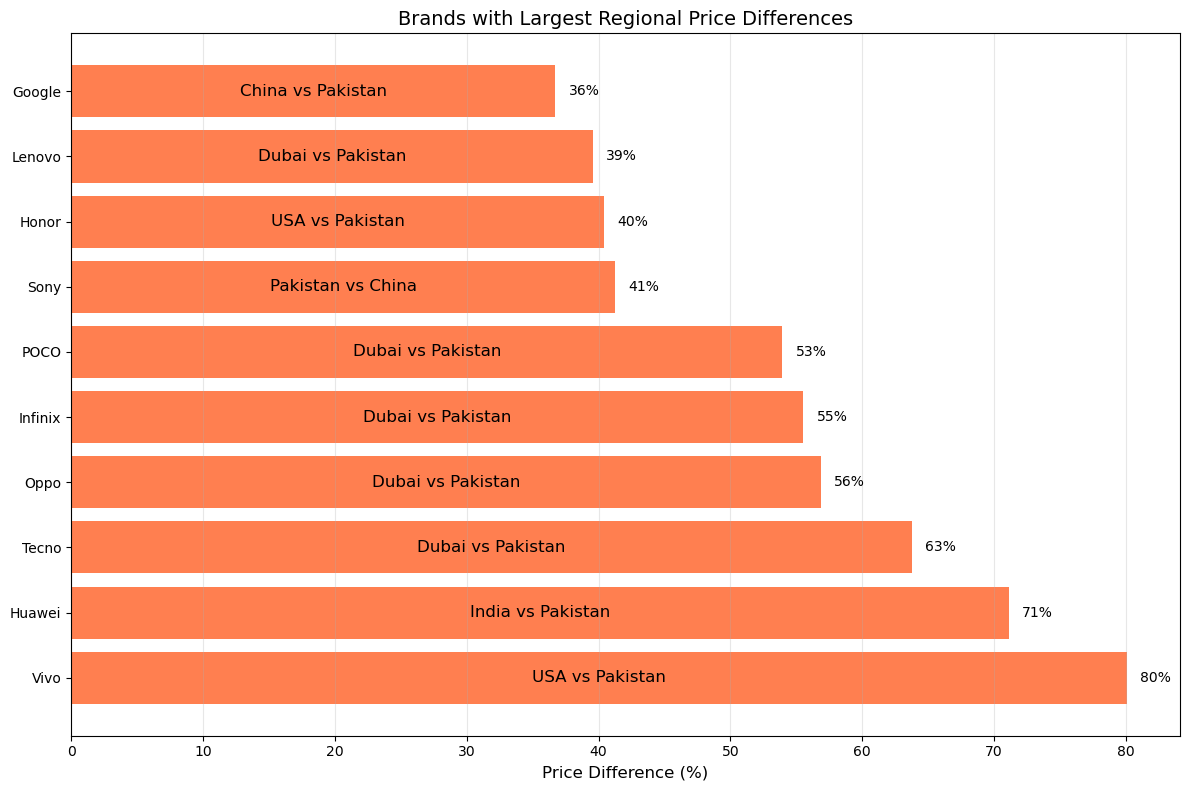

In [216]:
# Visualization: Brands with largest regional price differences
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_price_diff['Company.Name'], top_10_price_diff['Price_Range_Pct'], color="coral")

for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2., f"{int(width)}%", ha='left', va='center', fontsize=10)
    plt.text(width / 2, bar.get_y() + bar.get_height() / 2., f"{top_10_price_diff.iloc[i]['Max_Region']} vs {top_10_price_diff.iloc[i]['Min_Region']}",
            ha='center', va='center', color='black', fontsize=12)
plt.title('Brands with Largest Regional Price Differences', fontsize=14)
plt.xlabel('Price Difference (%)', fontsize=12)
plt.ylabel('', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [240]:
# Heatmap of regional price variations for top 10 brands
heatmap_data = []
top_10_brands_by_count = mobiles['Company.Name'].value_counts().nlargest(10).index.tolist()

for brand in top_10_brands_by_count:
    brand_data = mobiles[mobiles['Company.Name'] == brand]
    
    # The average price across all regions for this brand
    brand_avg = np.mean([
                        brand_data['Pakistan_USD'].mean(),
                        brand_data['India_USD'].mean(),
                        brand_data['China_USD'].mean(),
                        brand_data['USA_USD'].mean(),
                        brand_data['Dubai_USD'].mean()])
    
    for region, col in [('Pakistan', 'Pakistan_USD'),
                        ('India', 'India_USD'),
                        ('China', 'China_USD'),
                        ('USA', 'USA_USD'),
                        ('Dubai', 'Dubai_USD')]:
        
        region_avg = brand_data[col].mean()  # Get the region-specific average price
        price_diff_pct = (region_avg - brand_avg) / brand_avg * 100  # Calculate % difference
        
        heatmap_data.append({'Company.Name': brand,
                             'Region': region,
                             'Price_Difference_Pct': price_diff_pct})  # Append correctly

heatmap_df = pd.DataFrame(heatmap_data)
# Pivot for heatmap format
heatmap_pivot = heatmap_df.pivot(index='Company.Name', columns='Region', values='Price_Difference_Pct')

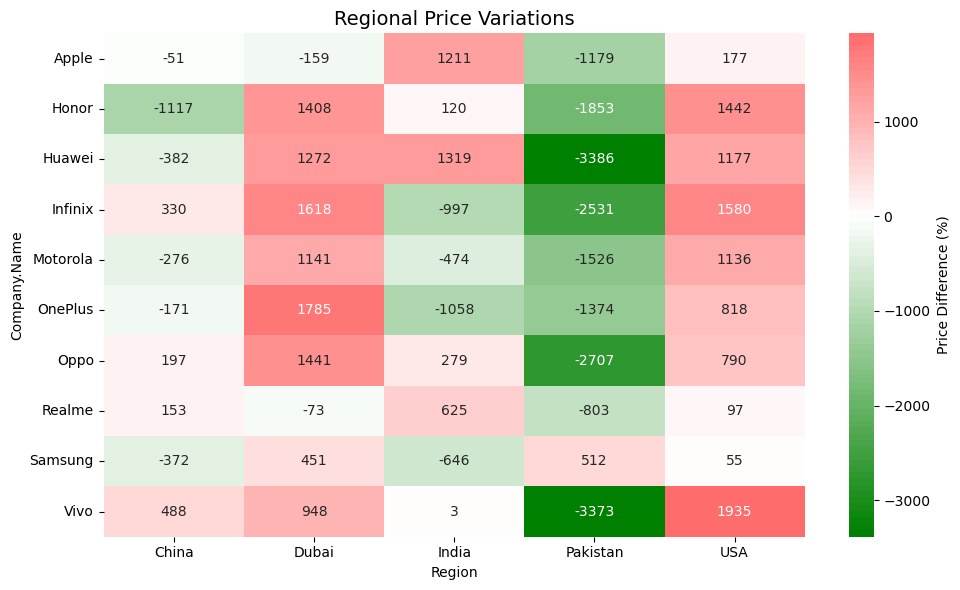

In [242]:
# Visualization: Heatmap of regional price variations
plt.figure(figsize=(10, 6))
custom_cmap = LinearSegmentedColormap.from_list('green_white_red', ['green', 'white', 'red'], N=100)
heatmap_pivot_percent = heatmap_pivot * 100  # Converting values to percentages manually
sns.heatmap(heatmap_pivot_percent, cmap=custom_cmap, center=0, annot=True, fmt=".0f", cbar_kws={'label': 'Price Difference (%)'})
plt.title('Regional Price Variations', fontsize=14)
plt.tight_layout()
plt.show()

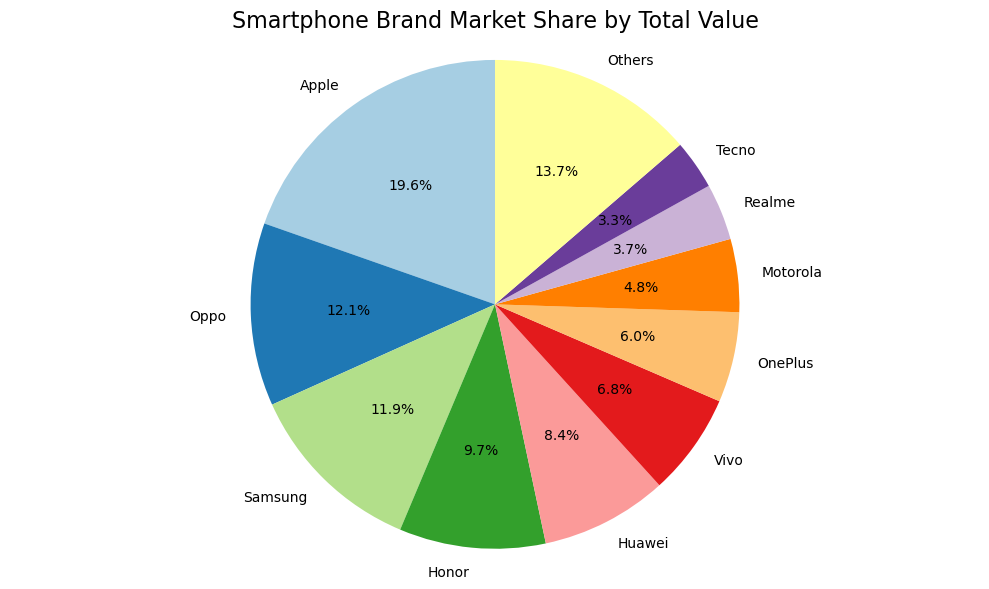

In [260]:
# Part 2: Additional visualizations

# Pie chart
brand_share = mobiles.copy()
brand_share['Total_USD'] = brand_share[price_columns].sum(axis=1)
brand_share = brand_share.groupby('Company.Name').agg(Market_Value=('Total_USD', 'sum')).reset_index()

brand_share['Percentage'] = brand_share['Market_Value'] / brand_share['Market_Value'].sum() * 100
brand_share = brand_share.sort_values('Market_Value', ascending=False)
top_10_share = brand_share.head(10).copy()
others_share = pd.DataFrame({
    'Company.Name': ['Others'],
    'Market_Value': [brand_share['Market_Value'].sum() - top_10_share['Market_Value'].sum()],
    'Percentage': [100 - top_10_share['Percentage'].sum()]
})
brand_share_final = pd.concat([top_10_share, others_share])

plt.figure(figsize=(10, 6))
plt.pie(brand_share_final['Percentage'], 
        labels=brand_share_final['Company.Name'], 
        autopct='%.1f%%',
        colors=sns.color_palette('Paired', len(brand_share_final)),
        startangle=90,
        shadow=False)
plt.title('Smartphone Brand Market Share by Total Value', fontsize=16)
plt.axis('equal')  # "Equal" aspect ratio makes pie a circle.
plt.tight_layout()
plt.show()

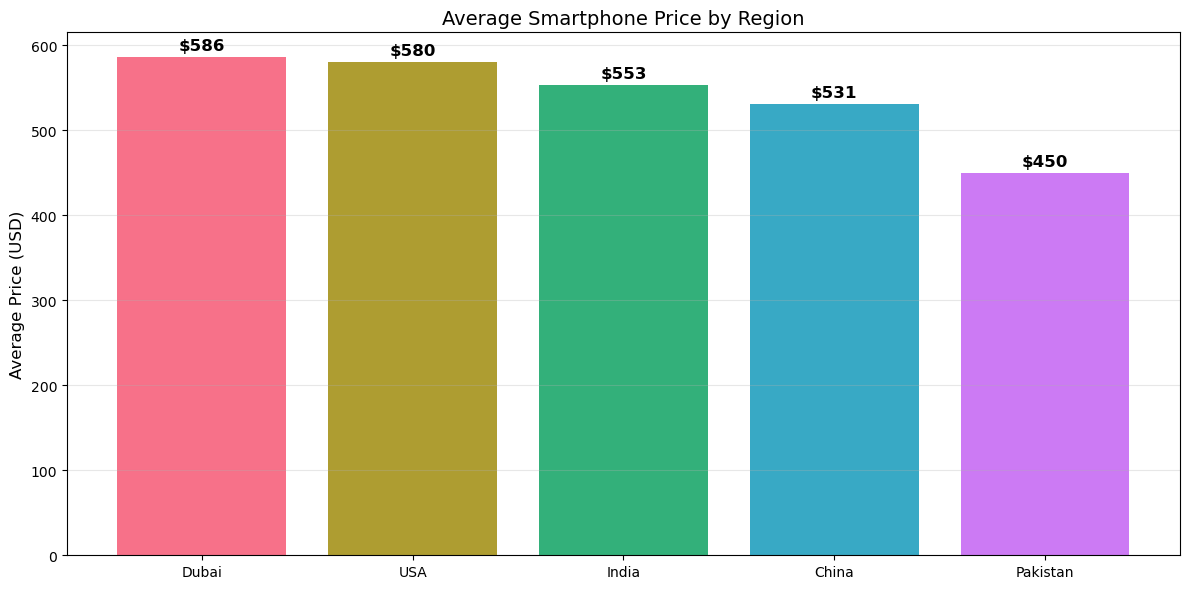

In [236]:
plt.figure(figsize=(12, 6))
bars = plt.bar(region_prices['Region'], region_prices['Price_USD'], width=0.8, color=sns.color_palette('husl', 5))
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + 5,
            f'${int(height)}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Average Smartphone Price by Region', fontsize=14)
plt.xlabel('', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()